## Import the packages

In [21]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv('groceries.csv', low_memory=False, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Drop all unnamed columns with no observations
data = data.dropna(axis=1, how='all')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
transactions = data.values.tolist()

# Remove empty entries (e.g., NaN or blank strings)
transactions_clean = [
    [item for item in transaction if isinstance(item, str) and item.strip() != '']
    for transaction in transactions
]

# One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions_clean).transform(transactions_clean)
basket = pd.DataFrame(te_ary, columns=te.columns_)

# Preview the one-hot encoded transaction matrix
basket.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [25]:
# Generate frequent itemsets with minimum support of 2%
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Sort and display top 10 most frequent itemsets
frequent_itemsets.sort_values(by='support', ascending=False).head(10)


,support,itemsets
57,0.255516,(whole milk)
39,0.193493,(other vegetables)
43,0.183935,(rolls/buns)
49,0.174377,(soda)
58,0.139502,(yogurt)
5,0.110524,(bottled water)
44,0.108998,(root vegetables)
53,0.104931,(tropical fruit)
47,0.098526,(shopping bags)
46,0.093950,(sausage)


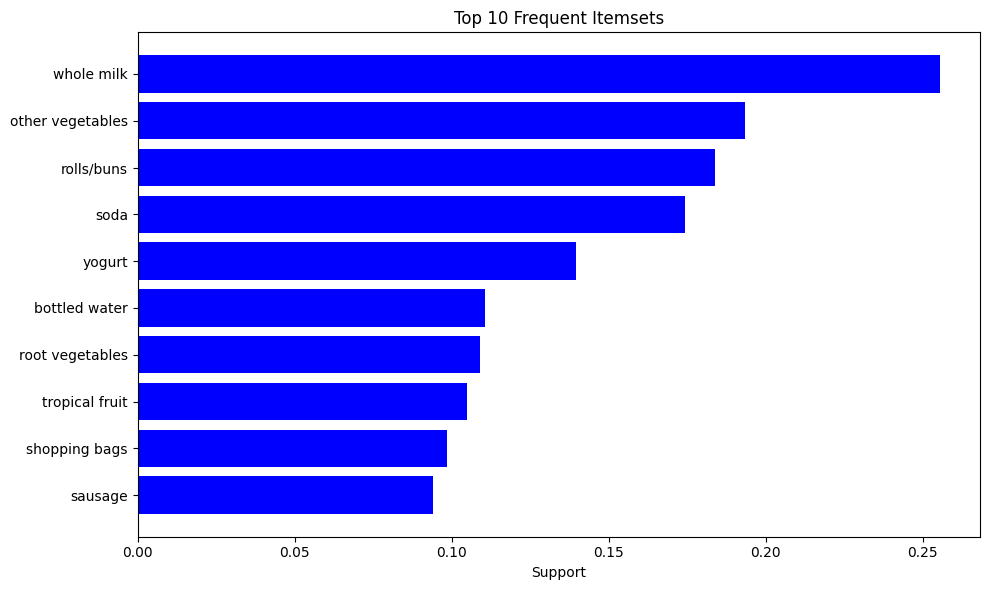

In [26]:
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

# Convert frozensets to strings for display
top_itemsets['itemset'] = top_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_itemsets['itemset'], top_itemsets['support'], color='b')
plt.xlabel('Support')
plt.title('Top 10 Frequent Itemsets')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [27]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Sort by lift (interestingness)
rules = rules.sort_values(by='lift', ascending=False)


# Show top 10 rules
rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
33,"(whole milk, other vegetables)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,1.0,0.015026,1.290900,0.700572,0.144304,0.225347,0.261235
32,"(whole milk, root vegetables)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,1.0,0.013719,1.533320,0.622230,0.105751,0.347821,0.296912
17,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,1.0,0.026291,1.426693,0.622764,0.185731,0.299078,0.339789
19,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,1.0,0.015006,1.350565,0.559803,0.122203,0.259569,0.276037
35,"(whole milk, yogurt)",(other vegetables),0.056024,0.193493,0.022267,0.397459,2.054131,1.0,0.011427,1.338511,0.543633,0.097987,0.252901,0.256270
36,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,1.0,0.011174,1.528340,0.524577,0.080485,0.345695,0.300014
4,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,1.0,0.013395,1.480817,0.514659,0.097237,0.324697,0.302543
16,(pork),(other vegetables),0.057651,0.193493,0.021657,0.375661,1.941476,1.0,0.010502,1.291779,0.514595,0.094373,0.225874,0.243795
7,(curd),(whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,1.0,0.012517,1.461085,0.505984,0.092446,0.315577,0.296363
34,"(root vegetables, other vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,1.0,0.011076,1.457687,0.501524,0.082879,0.313982,0.289999


A total of 37 association rules were created

In [28]:
rules_df = rules.sort_values(by='lift', ascending=False)
rules_df['rule'] = rules_df.apply(
    lambda row: f"If {', '.join(row['antecedents'])} → then {', '.join(row['consequents'])}", axis=1
)


rules_df.reset_index(drop=True, inplace=True)